In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.insert(0, "../helper")
# print(sys.path)

# own module
from visualisation.colour import *


  Layers  Areas Disease  Percentage
0    IML  abyss  normal          44
1    IML  abyss  normal          47
2    IML  abyss  normal          64
3    IML  abyss  normal          67
4    IML  abyss  normal          67


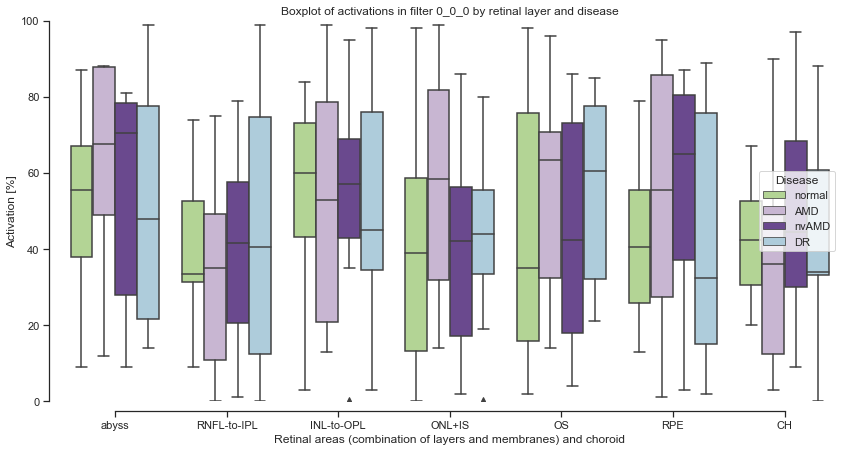

In [19]:
# Internal Limiting Membrane (ILM), lower surface of Inner Plexiform Layer (IPL), lower surface of Outer Plexiform Layer (OPL), 
# Inner Segment/Outer Segment (IS/OS), Retinal Pigment Epithelium (RPE), and Bruch’s Membrane (BM).
# Choroid (CH)

#print(sns.color_palette("Paired"))

#pal = sns.color_palette("Paired")
#pal.pop(4)
#pal.pop(4)
#pal.insert(0, pal[6]) 
#pal.insert(1, pal[8]) 

sns.set_theme(style="ticks", palette=normal_amd_cnv_dr.colors)

# Example data with subclasses
np.random.seed(0)
data = {
    'Layers': np.repeat(['IML', 'IPL', 'OPL', 'ISOS', 'RPE', 'BM', '-'], 40),
    'Areas': np.repeat(['abyss', 'RNFL-to-IPL', 'INL-to-OPL', 'ONL+IS', 'OS', 'RPE', 'CH'], 40), # 'IML', 'IPL', 'OPL', 'ISOS', 'RPE', 'BM', 'CH'
    'Disease': np.tile(np.repeat(['normal', 'AMD', 'nvAMD', 'DR'], 10), 7), # 'others', 'CSC', 'RVO'
    'Percentage': np.random.randint(0, 100, (40*7))
}


# Create a DataFrame
df = pd.DataFrame(data)

print(df.head())


# Create a boxplot with hue
plt.figure(figsize=(14, 7))
# or boxplot ...
#sns.catplot(x='Layer', y='Percentage', hue='Disease', data=df, kind="violin", bw_adjust=.5, cut=0, height=3, aspect=6)
sns.boxplot(x='Areas', y='Percentage', hue='Disease', data=df)

sns.despine(offset=10, trim=True)

# Set y-axis limits and labels
plt.ylim(0, 100)
plt.ylabel('Activation [%]')
plt.xlabel('Retinal areas (combination of layers and membranes) and choroid')

# Display the legend
#plt.legend(title='Disease', bbox_to_anchor=(1.05, 1), loc='upper left')

filter_id = "0_0_0"

# Display the plot
plt.title(f'Boxplot of activations in filter {filter_id} by retinal layer and disease')
plt.show()


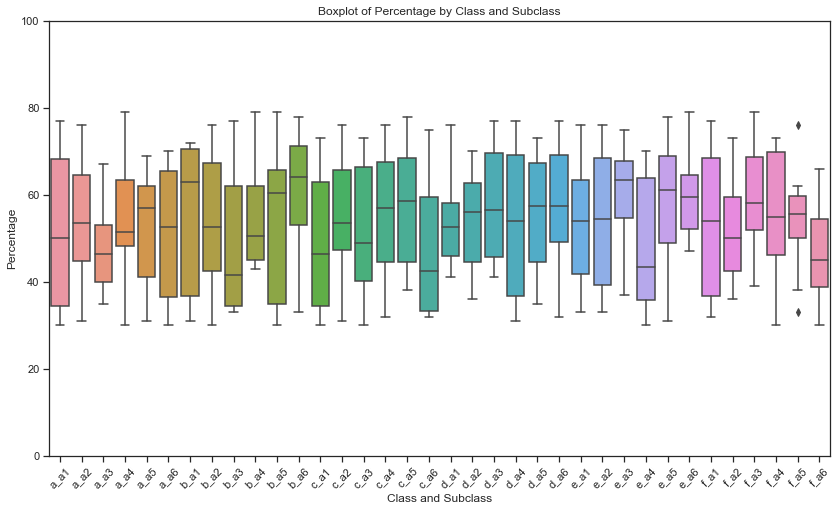

In [18]:
# Example data with subclasses
np.random.seed(0)
data = {
    'Class': np.repeat(['a', 'b', 'c', 'd', 'e', 'f'], 60),
    'Subclass': np.tile(np.repeat(['a1', 'a2', 'a3', 'a4', 'a5', 'a6'], 10), 6),
    'Percentage': np.random.randint(30, 80, 360)
}

# Create a DataFrame
df = pd.DataFrame(data)

# Combine Class and Subclass for the x-axis
df['Class_Subclass'] = df['Class'] + "_" + df['Subclass']

# Create a boxplot
plt.figure(figsize=(14, 8))
sns.boxplot(x='Class_Subclass', y='Percentage', data=df)

# Set y-axis limits and labels
plt.ylim(0, 100)
plt.ylabel('Percentage')
plt.xlabel('Class and Subclass')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.title('Boxplot of Percentage by Class and Subclass')
plt.show()


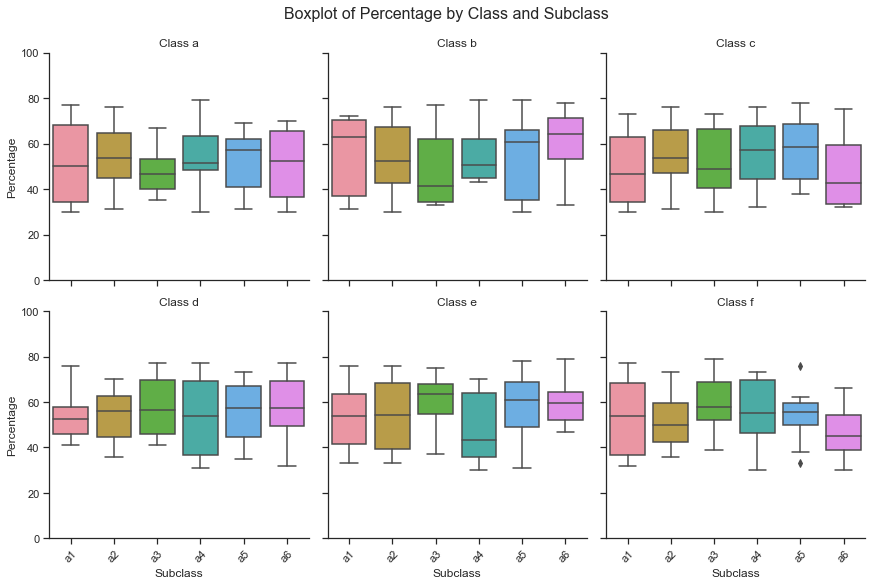

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Example data with subclasses
np.random.seed(0)
data = {
    'Class': np.repeat(['a', 'b', 'c', 'd', 'e', 'f'], 60),
    'Subclass': np.tile(np.repeat(['a1', 'a2', 'a3', 'a4', 'a5', 'a6'], 10), 6),
    'Percentage': np.random.randint(30, 80, 360)
}

# Create a DataFrame
df = pd.DataFrame(data)

# Create a boxplot using Seaborn's catplot
g = sns.catplot(
    data=df, kind="box",
    x="Subclass", y="Percentage",
    col="Class", col_wrap=3,
    height=4, aspect=1
)

# Set y-axis limits and labels
g.set(ylim=(0, 100))
g.set_axis_labels("Subclass", "Percentage")
g.set_titles("Class {col_name}")

# Rotate x-axis labels for better readability
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)

# Display the plot
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Boxplot of Percentage by Class and Subclass', fontsize=16)
plt.show()